In [1]:
import numpy as np
import skimage
import utils
import pathlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def otsu_thresholding(im: np.ndarray) -> int:
    """
    Otsu's thresholding algorithm that segments an image into 1 or 0 (True or False)
    The function takes in a grayscale image and outputs a threshold value

    args:
        im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
    return:
        (int) the computed thresholding value
    """
    assert im.dtype == np.uint8

    num_bins = 256

    ## Create and normalize histogram of color intensity
    histogram, bin_edges = np.histogram(im, bins=num_bins, range=(0, num_bins), density=True)

    ## Find the cumulative sum of the histogram
    cumulative_sum = np.cumsum(histogram)

    ## Find the cumulative mean of the histogram
    cumulative_mean = np.cumsum(np.arange(num_bins) * histogram)
    
    ## Find the global intensity mean
    global_intensity_mean = np.sum(np.arange(num_bins) * histogram)

    ## Calculate between-class variance
    numerator = (global_intensity_mean * cumulative_sum - cumulative_mean)**2
    denominator = cumulative_sum * (1 - cumulative_sum)
    
    ## Avoid division by zero and set to zero if denominator is zero
    variance_between_classes = np.where(denominator != 0, numerator / denominator, 0.0)
    
    ## Find the threshold that maximizes the between-class variance
    threshold = np.argmax(variance_between_classes)
    
    return threshold


Reading image: images/thumbprint.png
Found optimal threshold: 153


/tmp/ipykernel_6135/1359066565.py:35: RuntimeWarning: invalid value encountered in true_divide
  variance_between_classes = np.where(denominator != 0, numerator / denominator, 0.0)


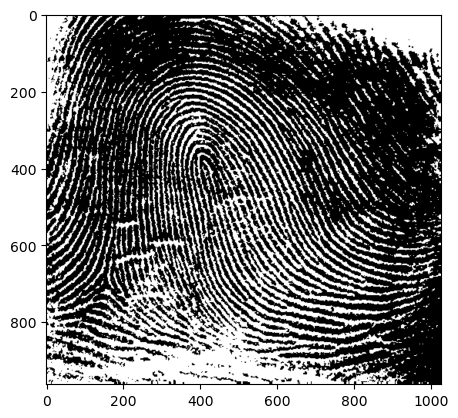

Saving image to: image_processed/thumbprint-segmented.png
Reading image: images/rice-shaded.png
Found optimal threshold: 134


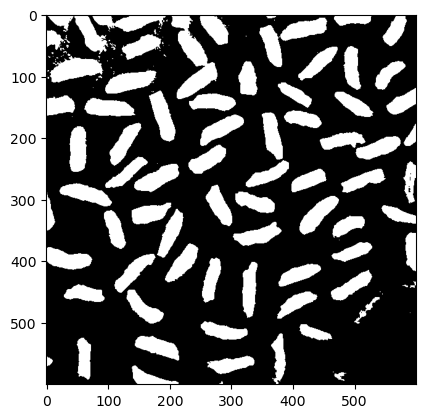

Saving image to: image_processed/rice-shaded-segmented.png


In [3]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impaths_to_segment = [
        pathlib.Path("thumbprint.png"),
        pathlib.Path("rice-shaded.png")
    ]
    for impath in impaths_to_segment:
        im = utils.read_image(impath)
        threshold = otsu_thresholding(im)
        print("Found optimal threshold:", threshold)

        # Segment the image by threshold
        segmented_image = (im >= threshold)
        assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
                im.shape, segmented_image.shape)
        assert segmented_image.dtype == bool, "Expected thresholded image dtype to be bool. Was: {}".format(
                segmented_image.dtype)

        segmented_image = utils.to_uint8(segmented_image)
        plt.imshow(segmented_image, cmap="gray")
        plt.show()

        save_path = "{}-segmented.png".format(impath.stem)
        utils.save_im(save_path, segmented_image)